In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Import and read the data

In [2]:
dataset = pd.read_excel('QVI_transaction_data.xlsx')

Check the data

In [3]:
dataset.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [4]:
dataset.shape

(264836, 8)

We have total 264836 rows and 8 columns

# See some statistical measures of the data

In [5]:
dataset.describe()

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,264836.00000,2.648360e+05,2.648360e+05,264836.000000,264836.000000,264836.000000
mean,135.08011,1.355495e+05,1.351583e+05,56.583157,1.907309,7.304200
std,76.78418,8.057998e+04,7.813303e+04,32.826638,0.643654,3.083226
min,1.00000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.500000
25%,70.00000,7.002100e+04,6.760150e+04,28.000000,2.000000,5.400000
50%,130.00000,1.303575e+05,1.351375e+05,56.000000,2.000000,7.400000
75%,203.00000,2.030942e+05,2.027012e+05,85.000000,2.000000,9.200000
max,272.00000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000


Here we can see the total count for all the columns.|
Also I see here mean, std and all the 5 percentiles we have to know.

# Check the Null values

In [6]:
dataset.isnull().sum()

DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
dtype: int64

So there are no any null values in the dataset

# plot the data to see the distribution 

plot the dependent variable

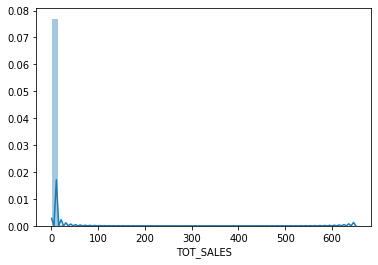

In [7]:
sns.distplot(dataset['TOT_SALES'])

Here I can see that there are almost all the values in the range of 0-100 and then some values comes after 600, so those are the outliers.

I can also use the boxplot to see that outlier

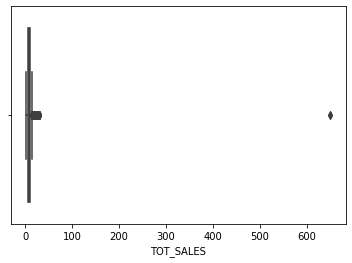

In [8]:
sns.boxplot(dataset['TOT_SALES'])

Here I can clearly see that outlier

# Remove outliers

Now I cure thus outlier by using IQR method

In [9]:
q1= dataset.TOT_SALES.quantile(0.25)
q3= dataset.TOT_SALES.quantile(0.75)
q1,q3

(5.4, 9.2)

In [10]:
iqr=q3-q1
iqr

3.799999999999999

In [11]:
lower_limit = (5.4-1.5*iqr)
upper_limit = (9.2+1.5*iqr)
lower_limit, upper_limit

(-0.29999999999999805, 14.899999999999999)

In [12]:
sales= dataset[dataset['TOT_SALES']< 14]


Here I made a range and take only those values which are in that range.
Plot the column again and look at the outliers

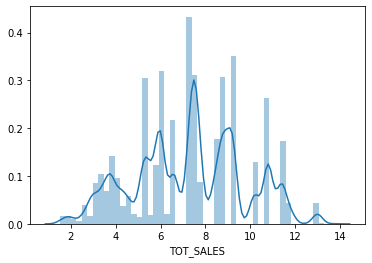

In [13]:
sns.distplot(sales.TOT_SALES)

Now there are no any outliers in this column. 
Check this for boxplot also

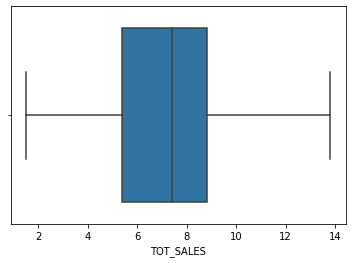

In [14]:
sns.boxplot(sales.TOT_SALES)

Also here I can't see any outliers in this column

# Checking the data type

In [15]:
dataset.dtypes

DATE              datetime64[ns]
STORE_NBR                  int64
LYLTY_CARD_NBR             int64
TXN_ID                     int64
PROD_NBR                   int64
PROD_NAME                 object
PROD_QTY                   int64
TOT_SALES                float64
dtype: object

Here there are 5 int , one float, one objet and one datetime column